In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import pandas as pd
from datetime import datetime

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.dataset_names import species_dict

In [3]:
datasets = list(species_dict.keys())
print(datasets)

['castellucci_mouse_usv_segmented', 'BIRD_DB_Vireo_cassinii', 'gibbon_morita_segmented', 'bengalese_finch_sober', 'buckeye', 'swamp_sparrow', 'mobysound_humpback_whale', 'koumura_bengalese_finch', 'batsong_segmented', 'giant_otter', 'BIRD_DB_Toxostoma_redivivum', 'zebra_finch_gardner_segmented', 'katahira_white_munia_segmented', 'european_starling_gentner_segmented', 'macaque_coo', 'zebra_finch_theunisson', 'marmoset', 'hildebrand_Cuviers_beaked_whale', 'hildebrand_Gervaiss_beaked_whale', 'NA_BIRDS_american_crow', 'NA_BIRDS_american_yellow_warbler', 'NA_BIRDS_blue_jay', 'NA_BIRDS_cedar_waxwing', 'NA_BIRDS_chipping_sparrow', 'NA_BIRDS_common_yellowthroat', 'NA_BIRDS_great_blue_heron', 'NA_BIRDS_house_finch', 'NA_BIRDS_indigo_bunting', 'NA_BIRDS_marsh_wren', 'NA_BIRDS_song_sparrow', 'canary_segmented']


In [4]:
# for each dataset, load it, and plot a set of spectrograms

In [11]:
dsets_to_load = list(DATA_DIR.glob('syllable_dfs/*/*.pickle'))
all_datasets_to_load = []
used_datasets = []
for i in dsets_to_load:
     if i.parent.stem in datasets:
        if i.parent.stem not in used_datasets:
            if i.parent.stem == "batsong_segmented":
                if i.stem == "fruitbat-just_audio":
                    continue
            if i.parent.stem == "swamp_sparrow":
                if i.stem != "swampsparrow-pad":
                    continue
            if i.parent.stem == 'buckeye': 
                if i.stem != 'phones':
                    continue
            all_datasets_to_load.append(i)
            used_datasets.append(i.parent.stem)
all_datasets_to_load = all_datasets_to_load + [DATA_DIR / 'syllable_dfs/NA_BIRDS/nabirds.pickle']
all_datasets_to_load = all_datasets_to_load + [DATA_DIR / 'syllable_dfs/hildebrand/beaked_whale.pickle']
all_datasets_to_load, len(all_datasets_to_load)        

([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/swamp_sparrow/swampsparrow-pad.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/batsong_segmented/fruitbat.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/macaque_coo/macaque.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/bengalese_finch_sober/gr41rd51.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/marmoset/marmoset.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/katahira_white_munia_segmented/munia.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/mobysound_humpback_whale/humpback.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/syllable_dfs/giant_otter/otter.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects

In [12]:
#del dset_specs['Human (English)']

In [13]:
dset_specs = {}

In [14]:
for dataset in tqdm(all_datasets_to_load):
    print(dataset.parent.stem)
    if dataset.parent.stem in species_dict:
        species= species_dict[dataset.parent.stem]['species']
        
        if species in dset_specs:
            continue
    
    dset = pd.read_pickle(dataset)  
    
    #
    if dataset.parent.stem == 'NA_BIRDS':
        for species in dset.species.unique():
            specs = dset[dset.species == species].spectrogram.values
            idxs = np.random.choice(len(specs), size=100, replace=False)
            dset_specs[species] = specs[idxs]    
        continue
    if dataset.parent.stem == 'hildebrand':
        for species in dset.common_name.unique():
            specs = dset[dset.common_name == species].spectrogram.values
            idxs = np.random.choice(len(specs), size=100, replace=False)
            dset_specs[species] = specs[idxs]    
        continue
    
    species= species_dict[dataset.parent.stem]['species']
    
    if species == 'Common marmoset': 
            dset = dset[dset.indvi == 0]
            dset = dset[
                ((dset.end_time - dset.start_time).values < 2)
                & ((dset.end_time - dset.start_time).values > 0.75)
            ]
            dset = dset[np.array([np.sum(i) for i in dset.spectrogram.values]) > 100]

    if dataset.parent.stem == 'bengalese_finch_sober':  
        specs = dset.syllables_spec.values
    else:
        specs = dset.spectrogram.values
    idxs = np.random.choice(len(specs), size=100, replace=False)
    dset_specs[species] = specs[idxs]    

swamp_sparrow
batsong_segmented
macaque_coo
bengalese_finch_sober
marmoset
katahira_white_munia_segmented
mobysound_humpback_whale
giant_otter
european_starling_gentner_segmented
zebra_finch_theunisson
koumura_bengalese_finch
BIRD_DB_Vireo_cassinii
canary_segmented
BIRD_DB_Toxostoma_redivivum
castellucci_mouse_usv_segmented
zebra_finch_gardner_segmented
gibbon_morita_segmented
buckeye
NA_BIRDS
hildebrand


In [15]:
dset_specs.keys()

dict_keys(['Swamp sparrow', 'Egyptian fruit bat', 'Macaque', 'Bengalese finch', 'Common marmoset', 'White-rumped munia', 'Humpback whale', 'Giant otter', 'European starling', 'Zebra finch', "Cassin's vireo", 'Canary', 'California thrasher', 'Mouse', 'Gibbon', 'Human (English)', 'American crow', 'American yellow warbler', 'Blue jay', 'Cedar waxwing', 'Chipping sparrow', 'Common yellowthroat', 'Great blue heron', 'House finch', 'Indigo bunting', 'Marsh wren', 'Song sparrow', "Cuvier's beaked whale", "Gervais's beaked whale"])

In [16]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

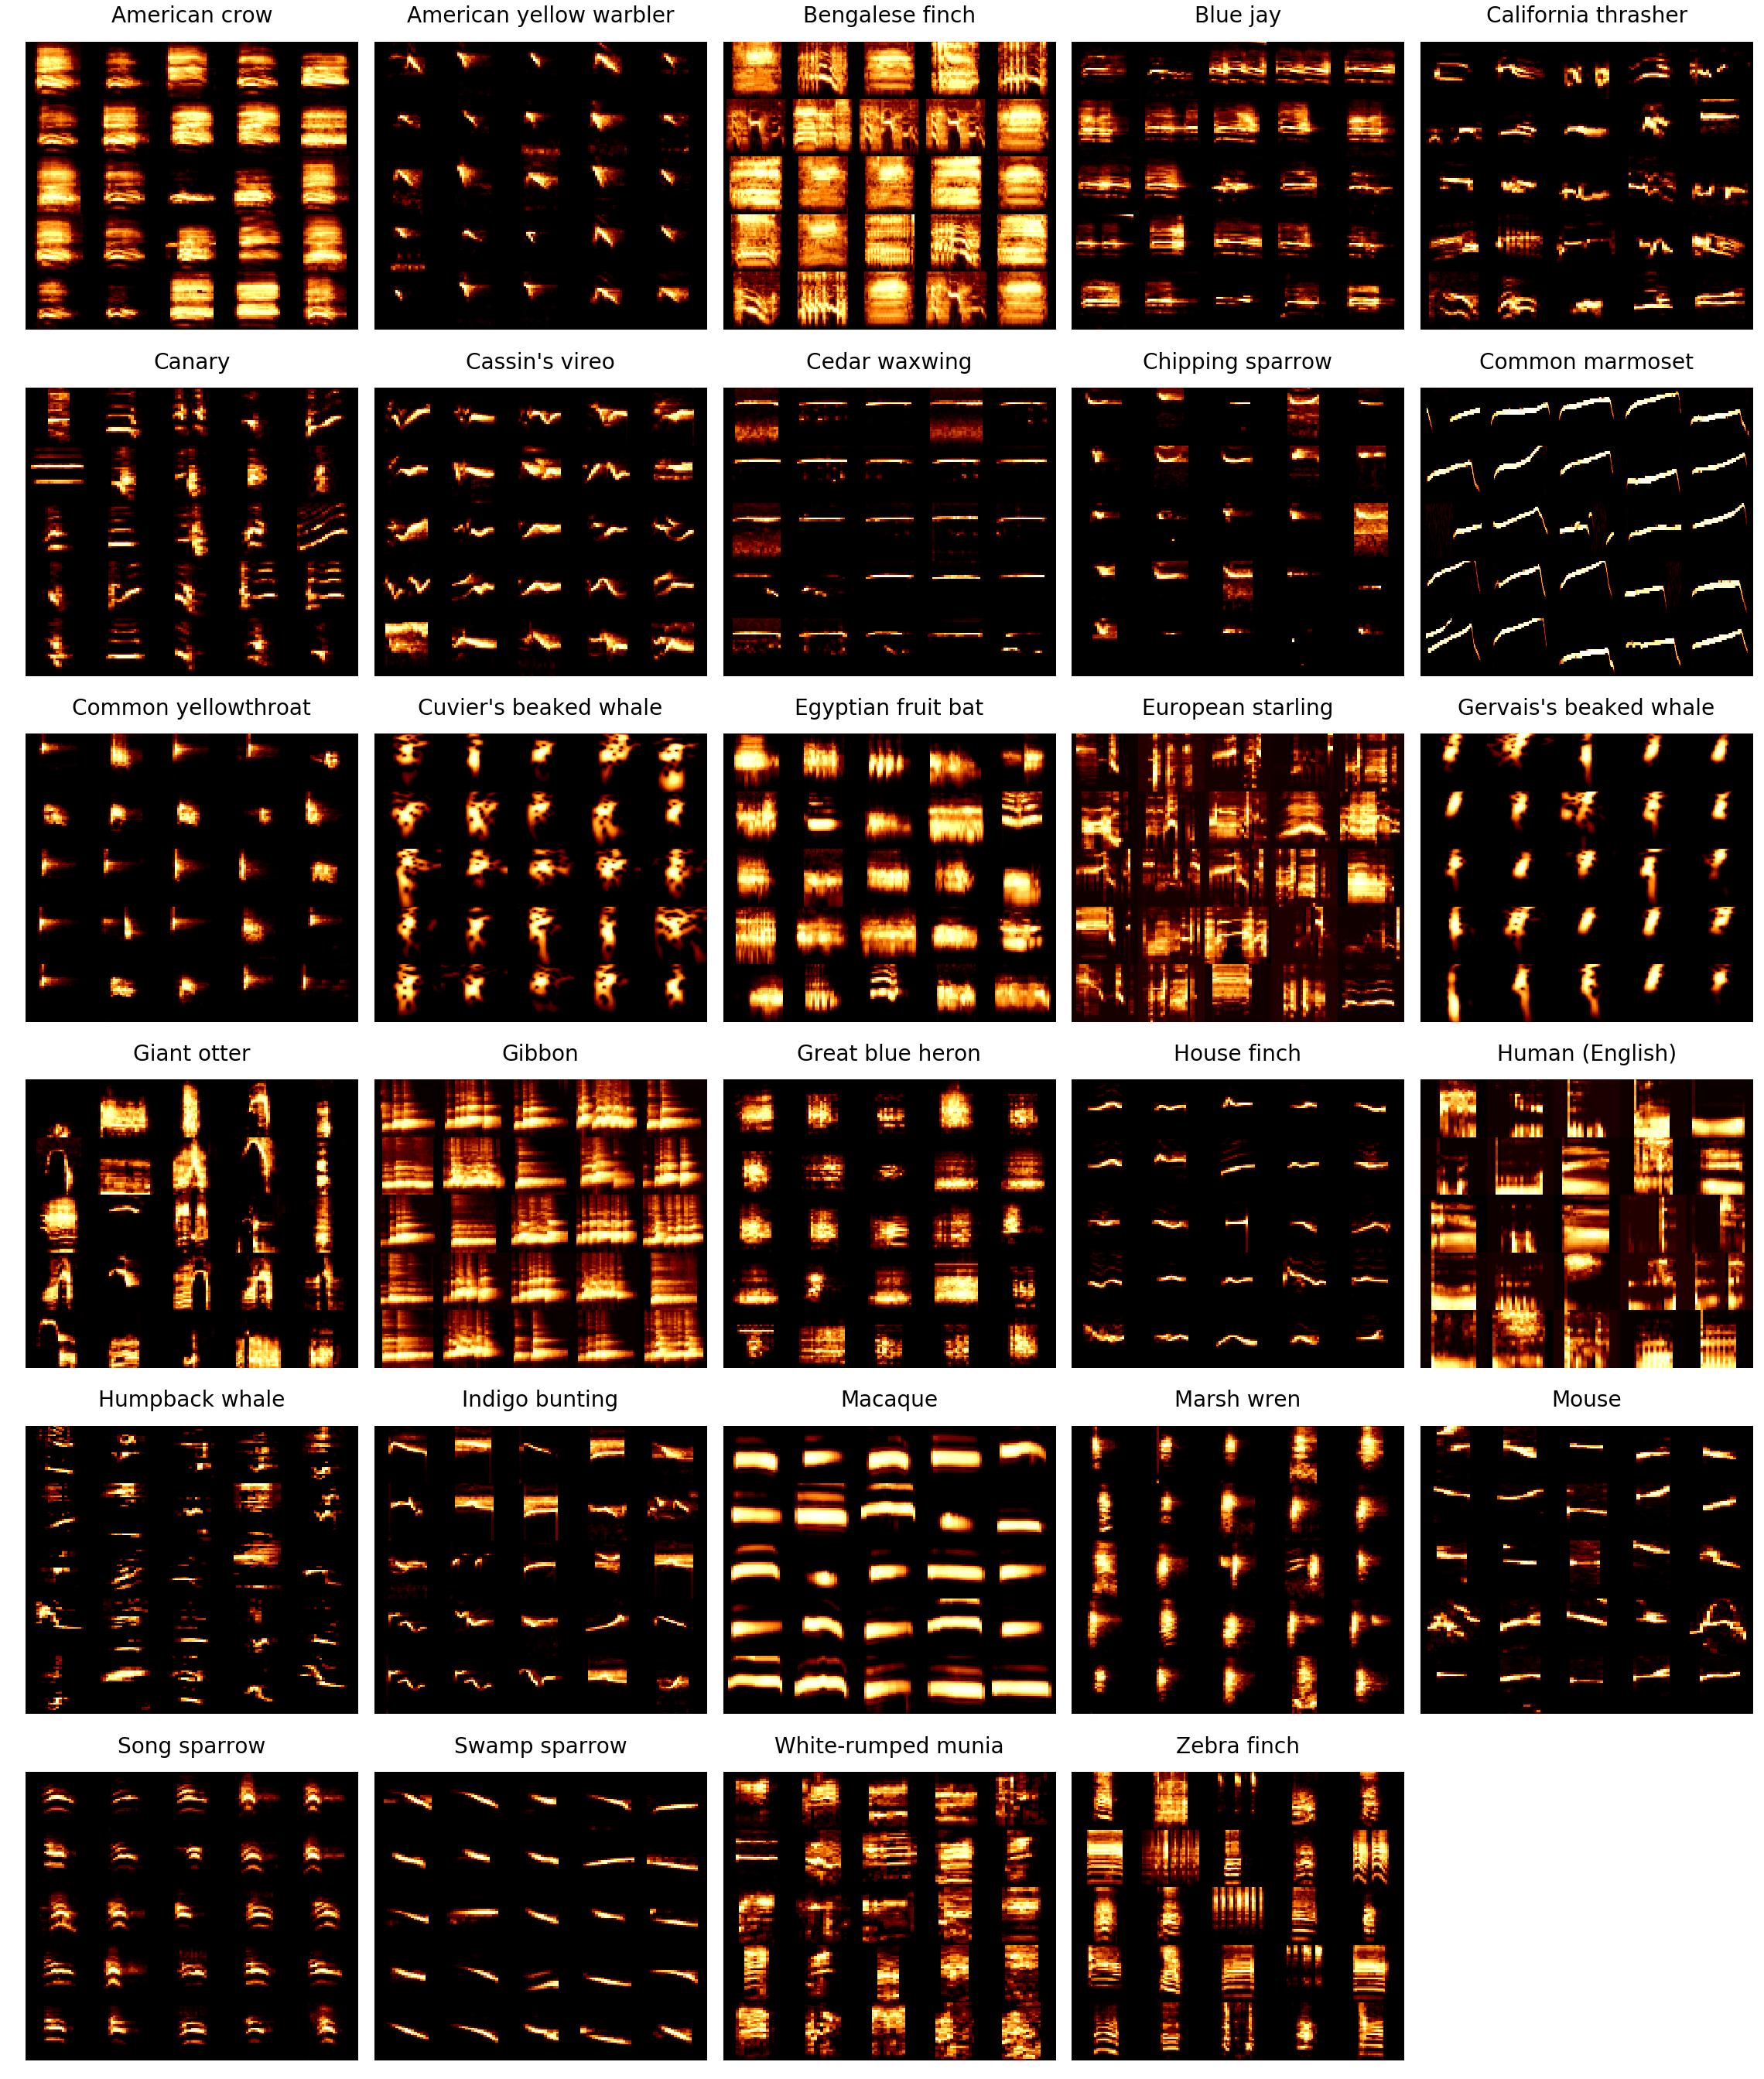

In [19]:
nex = 5
ncols = 5
nrows = int(np.ceil(len(dset_specs.keys())/ ncols))
zm = 8
fig, axs = plt.subplots(ncols=ncols, nrows= nrows, figsize=(ncols*zm, nrows*zm), gridspec_kw = {'wspace':0.05})
for si, species in tqdm(enumerate(np.sort(list(dset_specs.keys())))):
    ax = axs.flatten()[si]
    specs = dset_specs[species]
    spec_size = np.shape(specs[0])
    canvas = np.zeros((spec_size[0]*nex, spec_size[1]*nex))
    np.shape(canvas)
    for i in range(nex):
        for j in range(nex):
            a = i*nex+j
            canvas[i*spec_size[0]:(i+1)*spec_size[0], j*spec_size[1]:(j+1)*spec_size[1]] = specs[a] / np.max(specs[a])
            
    ax.matshow(canvas, interpolation = None, origin='lower', aspect='auto', vmin=0, cmap= plt.cm.afmhot)
    ax.set_title(species, fontsize=28)
    ax.axis('off')
for si in range(si, ncols*nrows):
    ax = axs.flatten()[si]
    ax.axis('off')
save_fig(FIGURE_DIR / 'vocalization_examples_larger', dpi=300, save_jpg=True, save_pdf=True)